##**Scenario:** Predict Employee Attrition using Classification Algorithms




Employee retention is one of the biggest metrics that a company should have in mind when thinking of growth. Employee attrition is caused when the total strength of the company is greatly reduced as more employees leave the company than expected.

So, what is **Attrition**?
It is basically the turnover rate of employees in a particular organization

Reasons for **Attrition**:

- Employees looking for better opportunities
- A negative working environment
- Bad management
- Sickness of an employee
- Excessive working hours

###**Problem Statement**
Uncover the factors that lead to employee attrition and explore the reasons as to why people are leaving the organization and predict whether an employee will leave the organization or not by creating a Web App using Streamlit that takes inputs from user's online





###**Dataset Description**
The data set contains the following attributes:

- **satisfaction_level**
- **last_evaluation**
- **number_project**
- **average_montly_hours**
- **time_spend_company**
- **Work_accident**
- **quit**
- **promotion_last_5years**
- **department**
- **salary**

###**Tasks to be performed:**
- Import required libraries and load the data set from Dropbox
- Perform Exploratory Data Analysis (EDA) on the data set
  - Plot **Univariate Distributions**
    - What is the distribution of the average_montly_hours & average_montly_hours columns in the data set?
    - What's the Attrition percentage in the company?
    - Which Department of the company has the highest Attrition rate?
  - Plot **Bi-Variate Distributions**
    - How does salary affect the attrition rate?
    - Do experienced employees tend to leave the company if they are not satisfied?
    - Which department executes the most number of projects?
- Pre-process that data set for modeling
  - Handle Missing values present in the data set
  - Encode the categorical variables present
  - Split the data into training and testing set using sklearn's **train_test_split** function
- Modelling
  - Build and evaluate an Interactive **Decision Tree** Model
  - Build and evaluate an Interactive **Random Forest** Model
- Implement **GridSearchCV** & **RandomizedSearchCV**


###**Importing Required Libraries & Loading the Dataset**




[**Click Here**](https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv?dl=0) to download the dataset

In [1]:
#Please run this cell in Google Colab to download the dataset

!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv

--2024-01-14 12:23:05--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2024-01-14 12:23:05--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc82acf46c55d3e3757852751af6.dl.dropboxusercontent.com/cd/0/inline/CLVmpYfOqA-4jK2QNfKYGvxxANO8G1DCZRg3TZTHPAKCpa3AdTwtuZ3UohPmrYmLSiM0VNPFBoRNmVUPMYyCaB8S23J7SNk4xEd2_eHe7UC5bNMhedPDU4_15RyS2KC3JSoD2lj8zRlL3i-6h9L-V4n1/file# [following]
--2024-01-14 12:23:05--  https://uc82acf46c55d3e3757852751af6.dl.dropboxusercontent.com/cd/0/inline/CLVmpYfOqA-4jK2QNfKYGvxxANO8G1DCZRg3TZTHPAKCpa3AdTwtuZ3UohPmrYmLSiM0VNPFBoRNmVUPMYyCaB8

In [2]:
  #Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings("ignore")
import os

print('Libraries Imported')

Libraries Imported


In [4]:
#Loading the dataset

df = pd.read_csv('/content/employee_data.csv')

df.head() #Printing the first 5 rows of dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###**Exploratory Data Analysis**

####**Plotting Univariate Distributions**
A **Univariate distribution** is a probability distribution of only one random variable

**Note:** You have already seen this in Pandas Profiling. Still, if you want to write the code, you can do so.

What is the distribution of the **average_montly_hours** & **satisfaction_level** columns in the data set?


In [5]:
import plotly.express as px
fig = px.histogram(df, x = 'average_montly_hours')
fig.show()

___
**Observations:**
- Most of the employees work between 125 and 265 hours monthly
- Very few employees spend less than 140 and more than 265 working on a monthly basis
___

In [6]:
fig = px.histogram(df, x = 'satisfaction_level')
fig.show()

___
**Observations:**
- More than 800 employees are not satasfied with their work and may leave the company
- Most of the employees are quite content with their job
___

**What's the Attrition percentage in the company?**


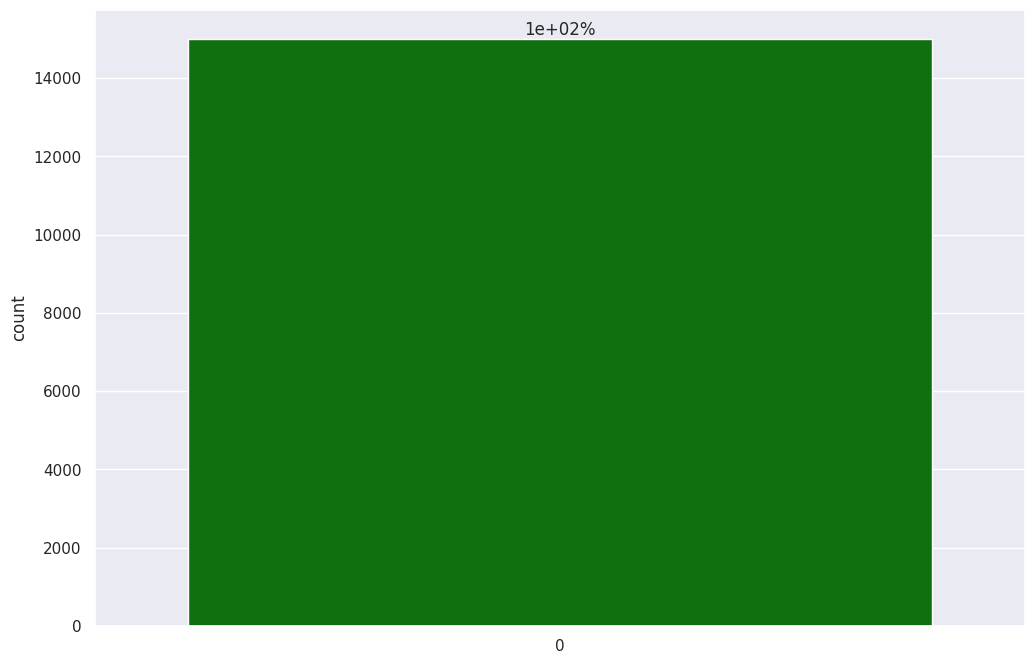

In [7]:
plt.figure(figsize=(12,8))

ax = sns.countplot(df["quit"], color='green')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]

    y = p.get_bbox().get_points()[1,1]

    ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()

___
**Observations:**
- 76% of employees did not leave the organization while 24% did leave
___

**Which Department of the company has the highest Attrition rate?**

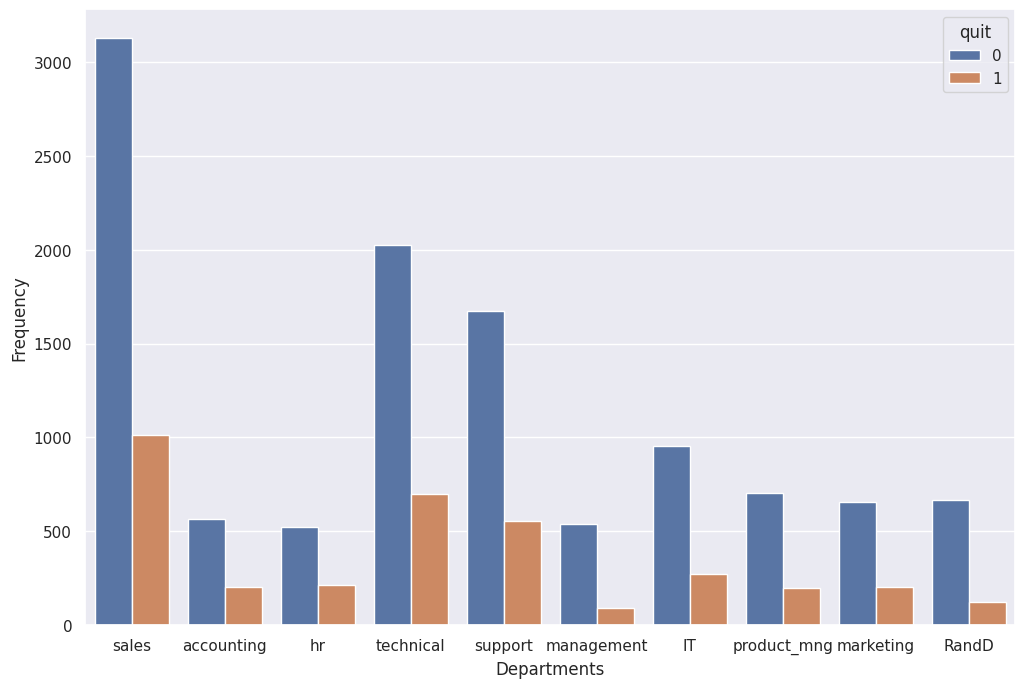

In [8]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['department'],hue="quit")

plt.xlabel('Departments')
plt.ylabel('Frequency')

plt.show()

___
**Observations:**
- **Sales** department has the highest attrition or turnover rate followed by **technical**, and **support** departments
- **Management** recorded the lowest number of employees leaving the company
___

####**Bi-variate Distributions**
- A Bi-variate distribution is a distribution of two random variables
- The concept generalizes to any number of random variables, giving a **Multivariate Distribution**

**How does salary affect the attrition rate?**

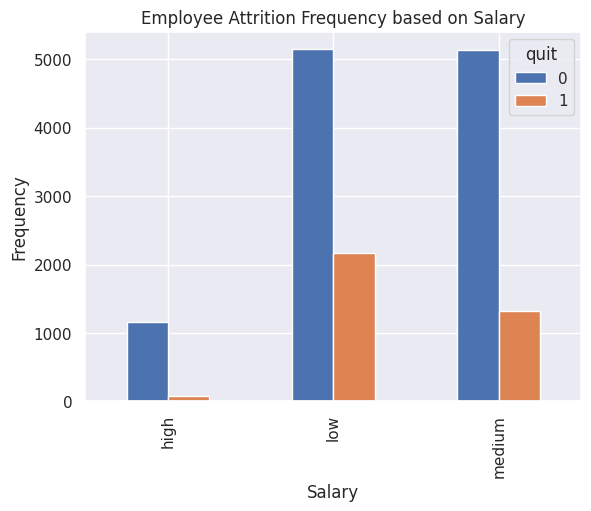

In [9]:
df_new = pd.crosstab(df['salary'], df['quit'])

df_new.plot(kind = 'bar')

plt.title('Employee Attrition Frequency based on Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

___
**Observations:**

- People with **low** salary are more likely to quit as compared to people with **medium** and **high** salaries
- People with **high** salary are very less likely to leave the organization
- Salary seems to be a significant factor in determining the turnover rate in employees
___

**Do experienced employees tend to leave the company if they are not satisfied?**

In [10]:
px.scatter(df, x=df['satisfaction_level'],y=df['time_spend_company'],color=df['quit'])

**Which department executes the most number of projects?**

In [11]:
fig = px.box(df, x="department",y="number_project")
fig.show()

###**Create Training and Testing Set**

In [12]:
X = df.drop('quit', axis = 1)
y = df.quit

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, stratify = y)

###**Data Pre-processing**

####**Encode Categorical Variables**

The dataset contains **2** Categorical Variables:

- **department**
- **salary**

We have to encode them before modelling because scikit learn doesn't accept string data as input

In [14]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_train[vars], prefix=vars)
  X_train = X_train.join(cat_list)

In [15]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_test[vars], prefix=vars)
  X_test = X_test.join(cat_list)

In [16]:
#Let us drop the department and salary columns

X_train.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_train.shape

(11999, 20)

In [17]:
X_test.drop(columns=['department', 'salary'], axis = 1, inplace=True)
X_test.shape

(3000, 20)

###**Build an Interactive Decision Tree Model**

[**Click Here!**](https://ipywidgets.readthedocs.io/en/latest/) to learn more about **ipywidgets**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [19]:
@interact #To convert any function into an inteactive one just write "@interact" immediately before the function definition

def plot_tree(
    crit = ['gini', 'entropy'],
    split = ['best','random'],
    depth = IntSlider(min = 1, max = 25, value =2, continuous_update = False),
    min_split = IntSlider(min = 1, max = 5, value =2, continuous_update = False),
    #min_split is the minimum number of samples  required to split an internal node in our decision tree
    min_leaf = IntSlider(min = 1, max = 5, value =1, continuous_update = False)):

  estimator = DecisionTreeClassifier(criterion=crit,
                                     splitter=split,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf
                                     )
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Decision Tree Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Decision Tree Training Accuracy',a, 'Decision Tree Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Split:', split,'\n', 'Depth:', depth,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')

  #Let us use GraphViz to export the model and display it as an image on the screen
  graph = Source(tree.export_graphviz(estimator, out_file=None,
                                      feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'],
                                      filled = True))

  display(Image(data=graph.pipe(format = 'png')))


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Decision Tree:

**Advantages:**
- Interpretable and easy to understand
- Can Handle Missing Values
- Feature Selection happens automatically


**Disadvantages:**
- Prone to overfitting
- Tends to add High Variance which means they tend to overfit
- Small changes in data greatly affect prediction




**One problem with Decision Tree is that they have Low Bias and High Variance which means they are prone to overfitting on the training set**



Now, let us see what **Underfit**, **Goodfit**, and **Overfit** is:

- **Underfit**
  - Model has not learned anything
  - **Training Accuracy**: **54%**
  - **Testing Accuracy**: **49%**

- **Overfit**
  - Model has memorized everything
  - **Training Accuracy**: **99%**
  - **Testing Accuracy**: **46%**

- **Goodfit**
  - Model has performed well on the testing data as well alongwith the training data
  - **Training Accuracy**: **93%**
  - **Testing Accuracy**: **91%**



Now, let's use a Random Forest Classifier to overcome the variance problem to get a better generalizable result

###**Build an Interactive Random Forest Model**

In [27]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=[True, False],  # Corrected the type to boolean
                 depth=IntSlider(min=1, max=20, value=3, continuous_update=False),
                 forests=IntSlider(min=1, max=1000, value=100, continuous_update=False),
                 min_split=IntSlider(min=2, max=5, value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1, max=5, value=1, continuous_update=False)):

    estimator = RandomForestClassifier(
        random_state=1,
        criterion=crit,
        bootstrap=bootstrap,
        n_estimators=forests,
        max_depth=depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        n_jobs=-1,
        verbose=False)

    estimator.fit(X_train, y_train)

    print('Random Forest Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
    print('Random Forest Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

    a = accuracy_score(y_train, estimator.predict(X_train))
    b = accuracy_score(y_test, estimator.predict(X_test))


    if a > 0.99:
        print('Random Forest Training Accuracy', a, 'Random Forest Testing Accuracy', b)
        print('Criterion:', crit, '\n', 'Bootstrap:', bootstrap, '\n', 'Depth:', depth, '\n',
              'Forests:', forests, '\n', 'Min_split:', min_split, '\n', 'Min_leaf:', min_leaf, '\n')

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages** & **Disadvantages** of Random Forest:

**Advantages:**
- Not prone overfitting
- Runs efficiently huge data sets
- Gives better accuracy than other classification algorithms

**Disadvantages:**
- Computationally Slower
- Found to be biased while dealing with categorical variables
- Although much lower than decision trees, overfitting is still a risk with random forests



###**Model Evaluation**

**Accuracy:** No. of correct predictions made by the model over all kinds predictions made

**When to use Accuracy:**

Accuracy is a good measure when the target variable classes in the data are nearly balanced. For example, No. of people who Survived Titanic (60% yes - 40% no)